In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

In [ ]:
!pip install joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import joblib

In [5]:
corpus = joblib.load('/content/drive/MyDrive/Colab Notebooks/NLP/Classification/Nepali Movie Review Classificaion/data_list.pkl')

In [6]:
type(corpus)

list

In [7]:
corpus[0:4]

['शिक्षक शिक्षा क्षेत्र रमा मान् सामुदायिक विद्यालय अध्यापन गराउ म चलचित्र मन छो वास्तविक घटना यहि नेपाल तमाम सामुदायिक विद्यालय यहि समस्या गुज्रीत शिक्षा सम्बन्धी चलचित्र बनोस अपेक्षा आसा पूरा धन्यवाद',
 'सरकारी स्कूल कलेज पढेर करीब बर्ष बिभिन्न बोडिङ्ग स्कूल पढा शिक्षक सरकारी स्कूल हु फिल्म सन्देशमुलक सबै हेर्नुहोला',
 'शिव मन्दिर देख्न पा ठाउ धन्यवाद सम्पुर्ण टिम विशेष केदार काली आ',
 'मारुनी विति सामान्य नाचनी आधारित कथा कथा आधारित यती कहानी फिल्म थिईन जव फिल्म पूरा हेर साचै नेपाली फिल्म इन्ड्रस्टी फड मार लाग् मारुनी सवै हेर्न अनुरोध गर्द रेटिङ स्टार मारुनी फिल्म टिम धन्यवाद']

In [8]:
corpus[0:4]

['शिक्षक शिक्षा क्षेत्र रमा मान् सामुदायिक विद्यालय अध्यापन गराउ म चलचित्र मन छो वास्तविक घटना यहि नेपाल तमाम सामुदायिक विद्यालय यहि समस्या गुज्रीत शिक्षा सम्बन्धी चलचित्र बनोस अपेक्षा आसा पूरा धन्यवाद',
 'सरकारी स्कूल कलेज पढेर करीब बर्ष बिभिन्न बोडिङ्ग स्कूल पढा शिक्षक सरकारी स्कूल हु फिल्म सन्देशमुलक सबै हेर्नुहोला',
 'शिव मन्दिर देख्न पा ठाउ धन्यवाद सम्पुर्ण टिम विशेष केदार काली आ',
 'मारुनी विति सामान्य नाचनी आधारित कथा कथा आधारित यती कहानी फिल्म थिईन जव फिल्म पूरा हेर साचै नेपाली फिल्म इन्ड्रस्टी फड मार लाग् मारुनी सवै हेर्न अनुरोध गर्द रेटिङ स्टार मारुनी फिल्म टिम धन्यवाद']

In [9]:
len('सामुदायिक')

9

In [10]:
# filter the words whose lenght is less than 5
def filter_length(corpus):
  new_corpus = []
  for sentence in corpus:
    s = " "
    for word in sentence.split():
      # keep the word only if the length of the word is greater than 5 in the corpus sentence list
      if(len(word) >= 5):
        s = s + word + " "
    # Remove the leading and the trailing zeros
    s = s.strip()
    if len(s) != 0:
      new_corpus.append(s)

  return new_corpus

In [ ]:
new_corpus = filter_length(corpus)

In [ ]:
len(new_corpus)

588

In [ ]:
new_corpus

['शिक्षक शिक्षा क्षेत्र सामुदायिक विद्यालय अध्यापन चलचित्र वास्तविक नेपाल सामुदायिक विद्यालय समस्या गुज्रीत शिक्षा सम्बन्धी चलचित्र अपेक्षा धन्यवाद',
 'सरकारी स्कूल बिभिन्न बोडिङ्ग स्कूल शिक्षक सरकारी स्कूल फिल्म सन्देशमुलक हेर्नुहोला',
 'मन्दिर देख्न धन्यवाद सम्पुर्ण विशेष केदार',
 'मारुनी सामान्य नाचनी आधारित आधारित कहानी फिल्म फिल्म नेपाली फिल्म इन्ड्रस्टी मारुनी हेर्न अनुरोध रेटिङ स्टार मारुनी फिल्म धन्यवाद',
 'फ्लिम हेरिसकेपछी दर्सक साम्राज्ञि अभिनय तारिफ',
 'सङ्गत घटनाक्रम भएपनि यतार्थ धन्यबाद आगामी चलचित्र हेर्न पाइयोस शुभकामना',
 'उपनियाश चलचित्र बुचार कलकार बसन्ती चलचित्र',
 'नेपाल फिल्म हावादारि टुप्पो फिल्म',
 'बिचारा निर्देशक कस्ता कलाकार इतिहास बनाइदि पहिला अध्यान फिल्म दर्शक किताब फिल्म',
 'फिल्म',
 'फिल्म यत्ती फिल्म नेपाल',
 'फिल्म साच्चि नेपाल झन्डा सुगन्ध',
 'फिल्म युटुब फिल्म अनमोल अभिनय फिल्म',
 'कलाकार पात्र',
 'फिल्म लागेन कलाकार थियोे',
 'टीपेर कलाकार डाइमंड शमशेर किताब बेज्जत',
 'फिल्म',
 'बस्तु लागेन लागेन',
 'झल्लो फिल्म लागेन',
 'फिलिम एस्तै फिलिम रमाइलो गरैद

In [ ]:
plt.rcParams["figure.figsize"] = (20,8)
word_cloud = ""
for row in new_corpus:
    for word in row:
        word_cloud+=" ".join(word)

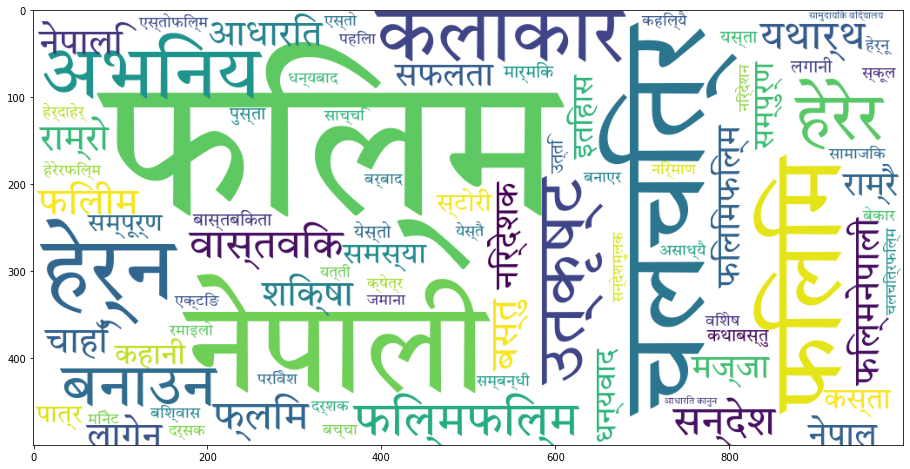

In [ ]:
font1 = "/content/drive/MyDrive/Colab Notebooks/NLP/Language Modelling/Word Embeddings/TiroDevanagariHindi-Regular.ttf"
wordcloud1 = WordCloud(width = 1000, height = 500, background_color = "white", min_font_size = 10, regexp=r"[\u0900-\u097F]+", font_path = font1).generate(word_cloud)
plt.imshow(wordcloud1)

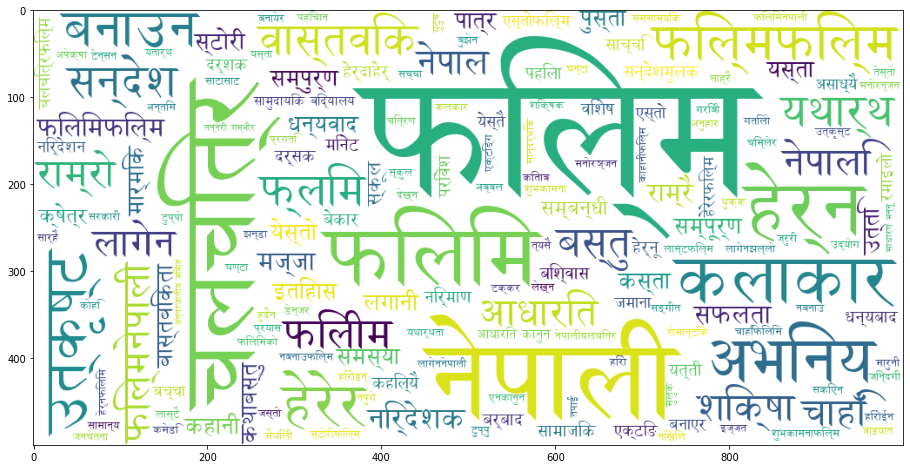

In [ ]:
font2 = "/content/drive/MyDrive/Colab Notebooks/NLP/Language Modelling/Word Embeddings/Kalimati Regular.otf"
wordcloud2 = WordCloud(width = 1000, height = 500, background_color ='white',min_font_size = 10, regexp=r"[\u0900-\u097F]+", font_path = font2).generate(word_cloud)
plt.imshow(wordcloud2)

In [ ]:
type(word_cloud)

str

In [ ]:
word_cloud

'शिक्षक शिक्षा क्षेत्र रमा मान् सामुदायिक विद्यालय अध्यापन गराउ म चलचित्र मन छो वास्तविक घटना यहि नेपाल तमाम सामुदायिक विद्यालय यहि समस्या गुज्रीत शिक्षा सम्बन्धी चलचित्र बनोस अपेक्षा आसा पूरा धन्यवादसरकारी स्कूल कलेज पढेर करीब बर्ष बिभिन्न बोडिङ्ग स्कूल पढा शिक्षक सरकारी स्कूल हु फिल्म सन्देशमुलक सबै हेर्नुहोलाशिव मन्दिर देख्न पा ठाउ धन्यवाद सम्पुर्ण टिम विशेष केदार काली आमारुनी विति सामान्य नाचनी आधारित कथा कथा आधारित यती कहानी फिल्म थिईन जव फिल्म पूरा हेर साचै नेपाली फिल्म इन्ड्रस्टी फड मार लाग् मारुनी सवै हेर्न अनुरोध गर्द रेटिङ स्टार मारुनी फिल्म टिम धन्यवादफ्लिम हेरिसकेपछी दर्सक साम्राज्ञि माया गर् उहा अभिनय जति तारिफ कएकद मन छो असल मान् सङ्गत खराब मान् असल घटनाक्रम छोटो भएपनि यतार्थ l धन्यबाद आगामी दिन लघु चलचित्र हेर्न पाइयोस शुभकामना lउपनियाश चलचित्र बनाउ बुचार बना भय कलकार छनोट उमेर पर बसन्ती चलचित्र बन्न सकेननेपाल ब सम्म खाते फिल्म यहि हावादारि छेउ टुप्पो फिल्म बनाकठै बिचारा निर्देशक कस्ता कलाकार इतिहास मजाक बनाइदि पहिला अध्यान हावा फिल्म बनाउ काहा पाहु हल दर्शक छि छि छि छि 

# Exploring with unicode converter

In [11]:
!pip install nepali_unicode_converter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
len('नेपल्')

5

In [16]:
from nepali_unicode_converter.convert import Converter
converter = Converter()
my_string = 'mero desha nepaala ho. ho ho ho jau harau karau lajau hasau hasau maatraa'
converted_string = converter.convert(my_string)
print(converted_string)

मेरो देश नेपाल हो। हो हो हो जौ हरौ करौ लजौ हसौ हसौ मात्रा


In [ ]:
converted_string 

'मेरो देश नेपल् हो। हो हो हो जौ हरौ करौ लजौ हसौ हसौ'

In [ ]:
temp_corpus = [my_string]

m
me
mer
mero
mero 
mero d
mero de
mero des
mero desh
mero desha
mero desha 
mero desha n
mero desha ne
mero desha nep
mero desha nepa
mero desha nepal
mero desha nepal 
mero desha nepal h
mero desha nepal ho
mero desha nepal ho.
mero desha nepal ho. 
mero desha nepal ho. h
mero desha nepal ho. ho
mero desha nepal ho. ho 
mero desha nepal ho. ho h
mero desha nepal ho. ho ho
mero desha nepal ho. ho ho 
mero desha nepal ho. ho ho h
mero desha nepal ho. ho ho ho
mero desha nepal ho. ho ho ho 
mero desha nepal ho. ho ho ho j
mero desha nepal ho. ho ho ho ja
mero desha nepal ho. ho ho ho jau
mero desha nepal ho. ho ho ho jau 
mero desha nepal ho. ho ho ho jau h
mero desha nepal ho. ho ho ho jau ha
mero desha nepal ho. ho ho ho jau har
mero desha nepal ho. ho ho ho jau hara
mero desha nepal ho. ho ho ho jau harau
mero desha nepal ho. ho ho ho jau harau 
mero desha nepal ho. ho ho ho jau harau k
mero desha nepal ho. ho ho ho jau harau ka
mero desha nepal ho. ho ho ho jau harau kar
mero desha 

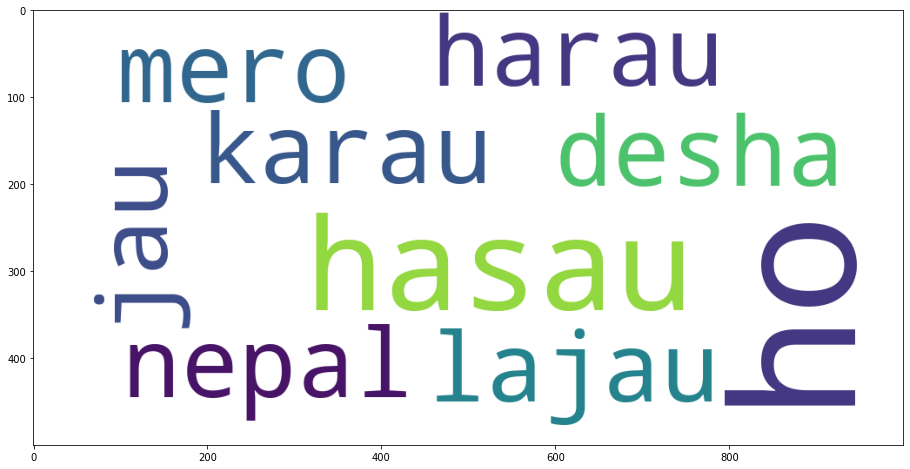

In [ ]:
plt.rcParams["figure.figsize"] = (20,8)
word_cloud = ""
for row in temp_corpus:
    for word in row:
        word_cloud+=" ".join(word)
        print(word_cloud)
print(type(word_cloud))
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud)

In [ ]:
temp_corp = [converted_string]
temp_corp

['मेरो देश नेपल् हो। हो हो हो जौ हरौ करौ लजौ हसौ हसौ']

म
मे
मेर
मेरो
मेरो 
मेरो द
मेरो दे
मेरो देश
मेरो देश 
मेरो देश न
मेरो देश ने
मेरो देश नेप
मेरो देश नेपल
मेरो देश नेपल्
मेरो देश नेपल् 
मेरो देश नेपल् ह
मेरो देश नेपल् हो
मेरो देश नेपल् हो।
मेरो देश नेपल् हो। 
मेरो देश नेपल् हो। ह
मेरो देश नेपल् हो। हो
मेरो देश नेपल् हो। हो 
मेरो देश नेपल् हो। हो ह
मेरो देश नेपल् हो। हो हो
मेरो देश नेपल् हो। हो हो 
मेरो देश नेपल् हो। हो हो ह
मेरो देश नेपल् हो। हो हो हो
मेरो देश नेपल् हो। हो हो हो 
मेरो देश नेपल् हो। हो हो हो ज
मेरो देश नेपल् हो। हो हो हो जौ
मेरो देश नेपल् हो। हो हो हो जौ 
मेरो देश नेपल् हो। हो हो हो जौ ह
मेरो देश नेपल् हो। हो हो हो जौ हर
मेरो देश नेपल् हो। हो हो हो जौ हरौ
मेरो देश नेपल् हो। हो हो हो जौ हरौ 
मेरो देश नेपल् हो। हो हो हो जौ हरौ क
मेरो देश नेपल् हो। हो हो हो जौ हरौ कर
मेरो देश नेपल् हो। हो हो हो जौ हरौ करौ
मेरो देश नेपल् हो। हो हो हो जौ हरौ करौ 
मेरो देश नेपल् हो। हो हो हो जौ हरौ करौ ल
मेरो देश नेपल् हो। हो हो हो जौ हरौ करौ लज
मेरो देश नेपल् हो। हो हो हो जौ हरौ करौ लजौ
मेरो देश नेपल् हो। हो हो हो जौ हरौ करौ लजौ 
मेरो देश ने

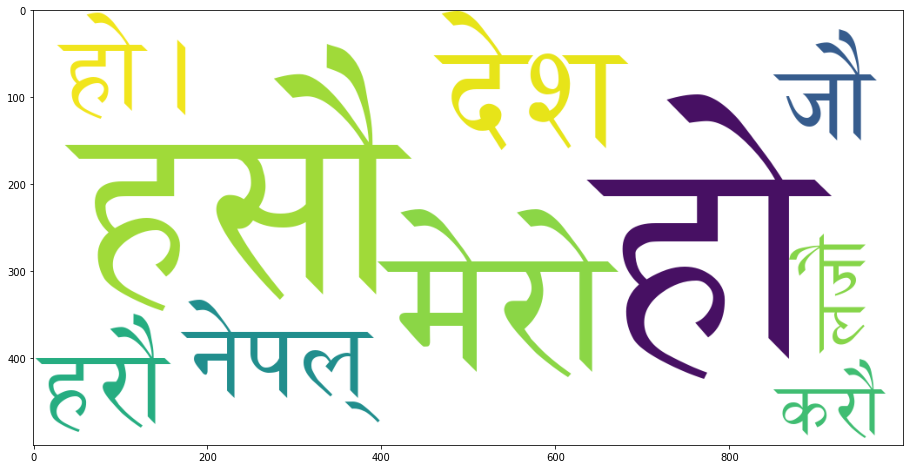

In [ ]:
plt.rcParams["figure.figsize"] = (20,8)
word_cloud = ""
for row in temp_corp:
    for word in row:
        word_cloud+=" ".join(word)
        print(word_cloud)
font2 = "/content/drive/MyDrive/Colab Notebooks/NLP/Language Modelling/Word Embeddings/Kalimati Regular.otf"
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10, regexp=r"[\u0900-\u097F]+", font_path = font2).generate(word_cloud)
plt.imshow(wordcloud)